### import library

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\RAHUL\Desktop\keggale data\100 Sales Records\100 Sales Records\100 Sales Records.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
Total_profit=df['Total Profit'].sum()
print('Total profit:',Total_profit)
Total_Revenue=df['Total Revenue'].sum()
print('Total Revenue:',Total_Revenue)

Total profit: 44168198.39999999
Total Revenue: 137348768.31


In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    object        
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memor

In [8]:
df['year']=df['Order Date'].dt.year
df['month']=df['Order Date'].dt.month
df['day']=df['Order Date'].dt.day

In [9]:
df.sample(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28
36,Middle East and North Africa,Syria,Fruits,Online,L,2011-11-22,162052476,12/3/2011,3784,9.33,6.92,35304.72,26185.28,9119.44,2011,11,22
33,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,3/1/2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,2015,1,16


### Year month-wise sale Trend

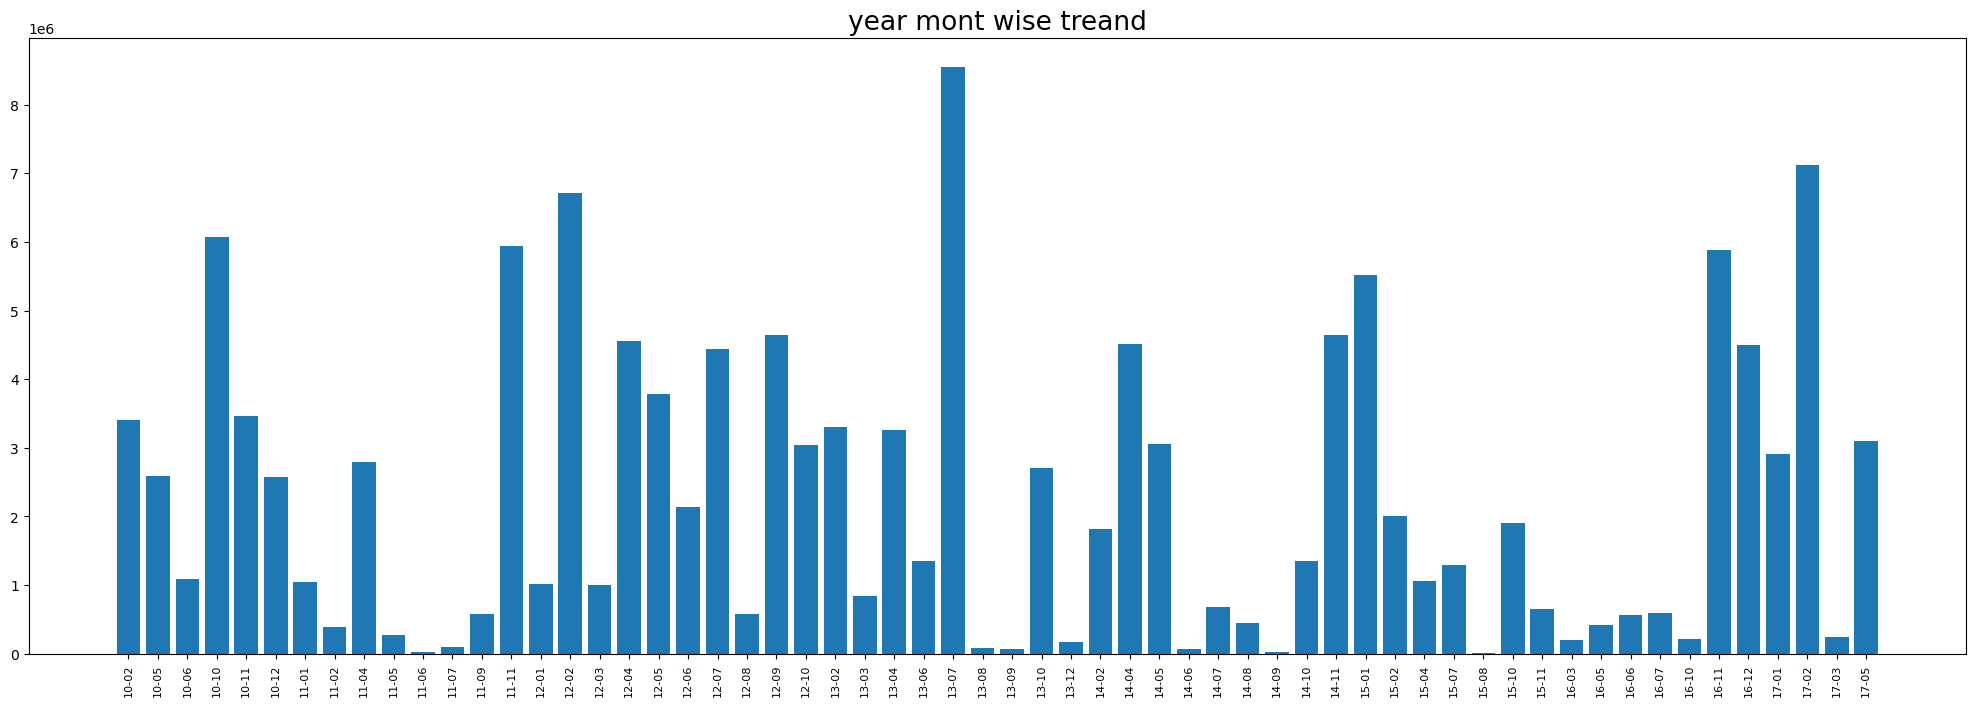

In [10]:
df['month_year']=df['Order Date'].apply(lambda x: x.strftime('%y-%m'))
month_year=df.groupby('month_year').sum()['Total Revenue'].reset_index()
plt.figure(figsize=(25,8))
plt.title('year mont wise treand',size=19)
plt.bar(month_year['month_year'],month_year['Total Revenue'])
plt.xticks(rotation='vertical',size=8)
plt.show()

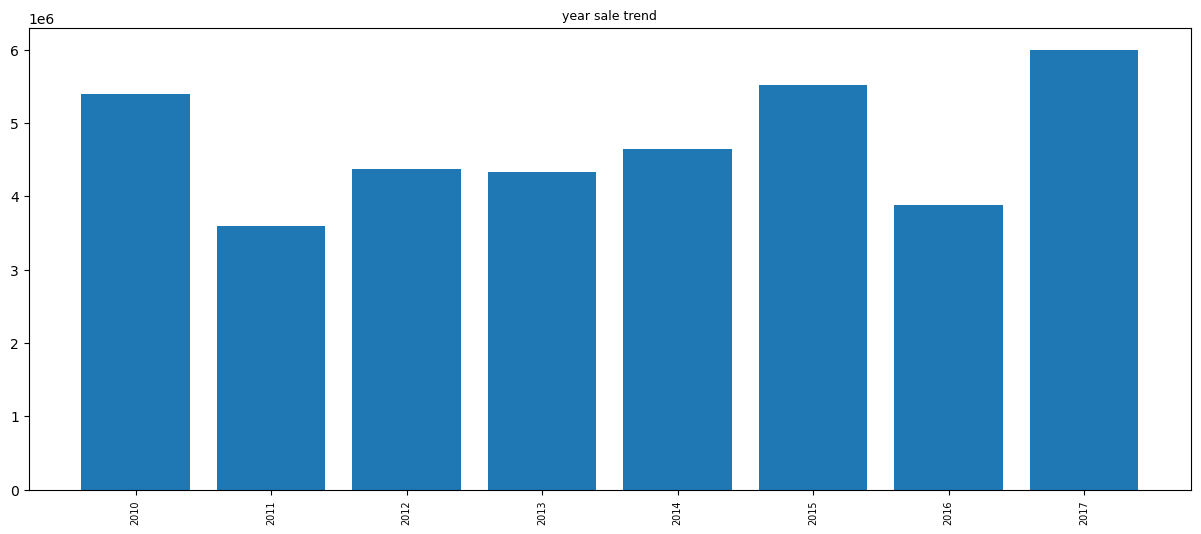

In [11]:
### Year Sale treand
plt.figure(figsize=(15,6))
plt.title('year sale trend',size=9)
plt.bar(df['year'],df['Total Revenue'])
plt.xticks(rotation='vertical',size=7)
plt.show()

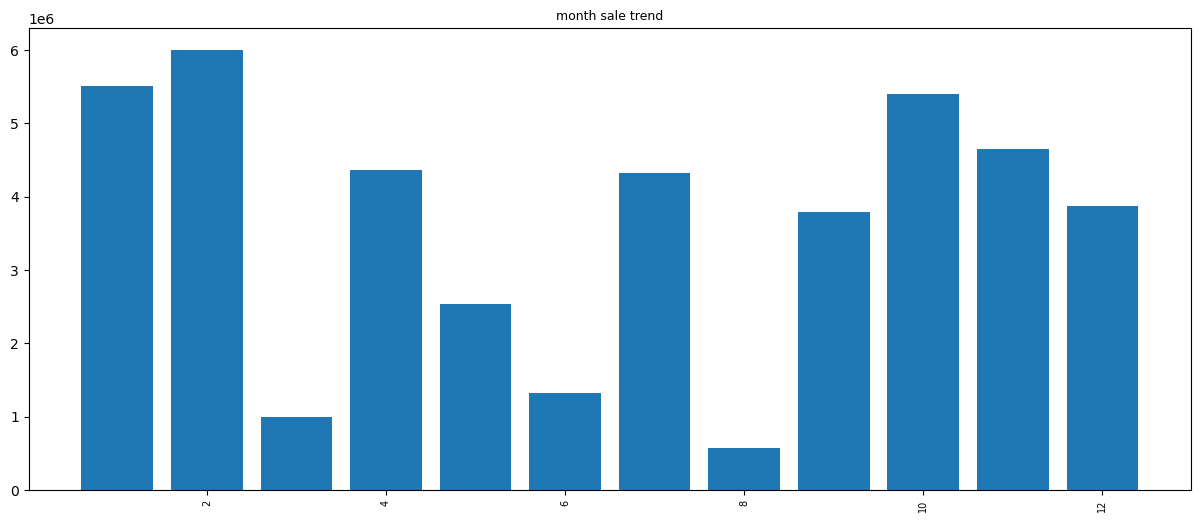

In [12]:
## Monthly Sale Trend
plt.figure(figsize=(15,6))
plt.title('month sale trend',size=9)
plt.bar(df['month'],df['Total Revenue'])
plt.xticks(rotation='vertical',size=7)
plt.show()

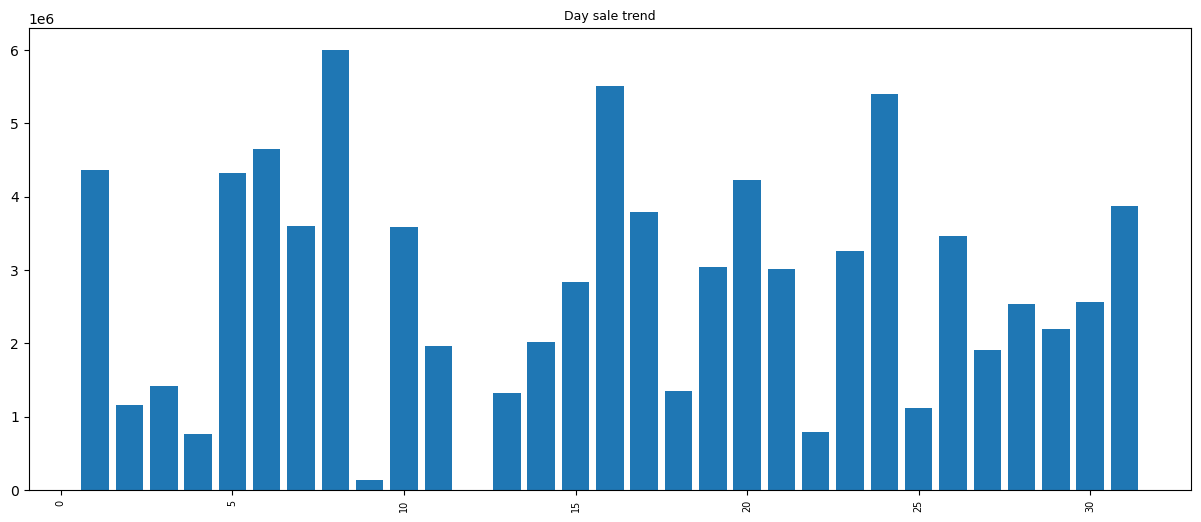

In [13]:
## Day Sale Trend
plt.figure(figsize=(15,6))
plt.title('Day sale trend',size=9)
plt.bar(df['day'],df['Total Revenue'])
plt.xticks(rotation='vertical',size=7)
plt.show()

In [14]:
## Grouping item Coulum
Product_sale=pd.DataFrame(df.groupby('Item Type').sum()['Total Revenue'])
## Sorting sale
Product_sale=Product_sale.sort_values('Total Revenue',ascending=False)
## Top item by sale
Product_sale[:10]

,Total Revenue
Item Type,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


In [15]:
## Total profit by Country
F=df.groupby('Country').sum('Total Profit')
pd.DataFrame(F)


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,day
Country,,,,,,,,,,
Albania,385383069,2269,109.28,35.84,247956.32,81320.96,166635.36,2010,2,2
Angola,135425221,4187,668.27,502.54,2798046.49,2104134.98,693911.51,2011,4,23
Australia,849569283,12995,904.36,673.86,2489933.49,1913328.37,576605.12,6042,23,43
Austria,868214595,2847,437.20,263.33,1244708.40,749700.51,495007.89,2015,2,23
Azerbaijan,805723690,9255,1088.41,788.29,4478800.21,2965873.38,1512926.83,4022,8,19
...,...,...,...,...,...,...,...,...,...,...
The Gambia,3200568674,14813,1551.14,1143.76,5449517.95,4063634.68,1385883.27,8055,14,50
Turkmenistan,904025148,8840,1319.48,1027.50,5822036.20,4554777.80,1267258.40,4023,16,53
Tuvalu,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28


<AxesSubplot:ylabel='Country'>

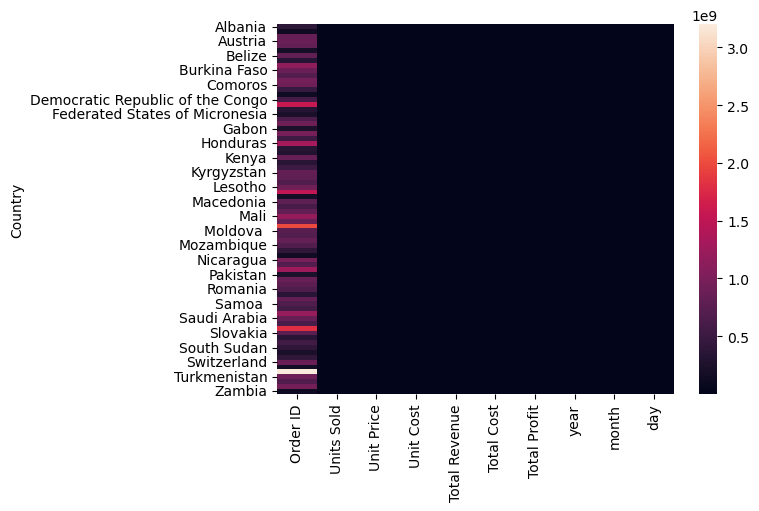

In [16]:
sns.heatmap(F)

In [17]:
F1=pd.DataFrame(df.groupby('Country').sum()[('Total Revenue')])
F2=F1.sort_values('Total Revenue',ascending=False)

In [18]:
F1

,Total Revenue
Country,
Albania,247956.32
Angola,2798046.49
Australia,2489933.49
Austria,1244708.40
Azerbaijan,4478800.21
...,...
The Gambia,5449517.95
Turkmenistan,5822036.20
Tuvalu,2533654.00


In [19]:
F2

,Total Revenue
Country,
Honduras,6336545.48
Myanmar,6161257.90
Djibouti,6052890.86
Turkmenistan,5822036.20
Mexico,5643356.55
...,...
Syria,35304.72
Slovakia,26344.26
New Zealand,20404.71


<AxesSubplot:ylabel='Country'>

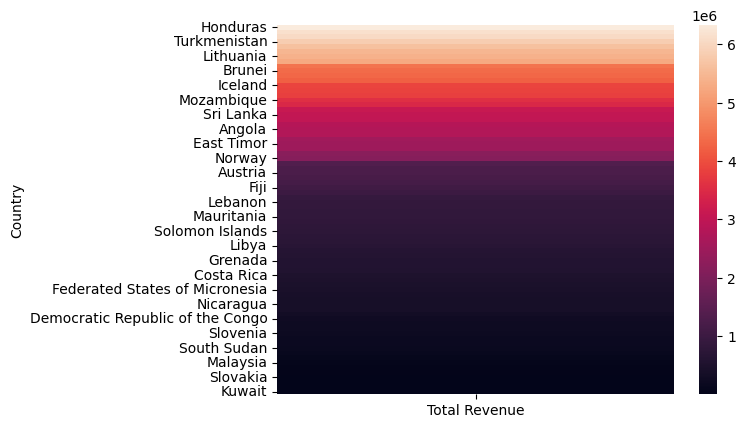

In [20]:
sns.heatmap(F2)

In [21]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'year',
       'month', 'day', 'month_year'],
      dtype='object')

In [22]:
F3=pd.DataFrame(df.groupby('Region').sum()['Total Cost'])
F4=F3.sort_values('Total Cost',ascending=False)

In [23]:
F4.head()

,Total Cost
Region,
Sub-Saharan Africa,27488820.03
Europe,22285993.48
Asia,15233245.15
Australia and Oceania,9372105.10
Middle East and North Africa,8291514.72


C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Date'>

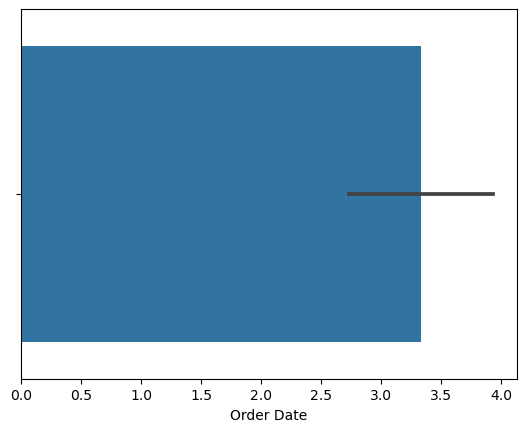

In [24]:
Day=df['Order Date'].dt.day.value_counts()
Day=Day.sort_index()
sns.barplot(Day)

In [ ]:
sns.regplot(x=df['Total Cost'],y=df['Total Profit'])

In [ ]:
sns.scatterplot(x=df['Units Sold'],y=df['Total Profit'])

In [ ]:
sns.kdeplot(data=df['Total Cost'],label='Data_cost',shade=True)
sns.kdeplot(data=df['Total Profit'],label='Data_profit',shade=True)

In [ ]:
sns.distplot(df['Total Profit'],bins=10)